# DETEKSI PART KOMPUTER

## Import library yang digunakan


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam

## inisiasi direktori dataset dan image shape

In [2]:
dir = "Part Komputer"
lebar = 300
tinggi = 300
img_shape = (lebar, tinggi)

In [3]:
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2
    
)

## Jumlah class

In [4]:
classes = sorted(listdir(dir))
classes

['Case', 'Gpu', 'Headset']

In [5]:
train_generator = datagen.flow_from_directory(
    dir,
    target_size = img_shape,
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical', #isi 'binary' jika class hanya dua, isi categorical jika lebih dari2 
    subset = 'training', #wajib ada subset, karena untuk membedakan train/val
)
val_generator = datagen.flow_from_directory(
    dir,
    target_size = img_shape,
    batch_size = 32,
    #shuffle = True,
    class_mode = 'categorical', #isi 'binary' jika class hanya dua, isi categorical jika lebih dari2 
    subset = 'validation', #wajib ada subset, karena untuk membedakan train/val
    
    
)

Found 254 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


## Membangun model

In [6]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=[lebar, tinggi, 3]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
    
    
])

C:\Users\Yha\B1-21\Yahya_073\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
print(train_generator.samples, val_generator.samples)

254 62


## Train model

In [8]:
opt = Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['acc'])
hasil  = model.fit(
    train_generator,
    epochs = 20,
    validation_data = val_generator,
    verbose = 1,
)

Epoch 1/20


C:\Users\Yha\B1-21\Yahya_073\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - acc: 0.3387 - loss: 1.3953 - val_acc: 0.5645 - val_loss: 1.0627
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - acc: 0.4674 - loss: 1.0820 - val_acc: 0.5484 - val_loss: 0.9035
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.5366 - loss: 0.9466 - val_acc: 0.5806 - val_loss: 0.8325
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - acc: 0.5619 - loss: 0.8937 - val_acc: 0.6613 - val_loss: 0.7887
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.6050 - loss: 0.8596 - val_acc: 0.7581 - val_loss: 0.7234
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - acc: 0.6488 - loss: 0.8012 - val_acc: 0.5968 - val_loss: 0.7728
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.6454 - loss: 0.7688 - val_acc: 0.7742 - val_loss: 0.6146
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.6935 - loss: 0.7594 - val_acc: 0.7419 - val_loss: 0.6287
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.7156 - loss: 0.6896 - val_acc: 0.7742 - va

## Evaluasi Model

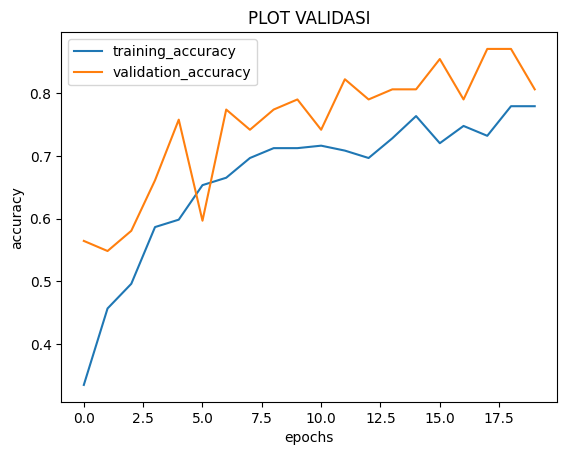

In [9]:
plt.plot(hasil.history['acc'])
plt.plot(hasil.history['val_acc'])
plt.title('PLOT VALIDASI')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

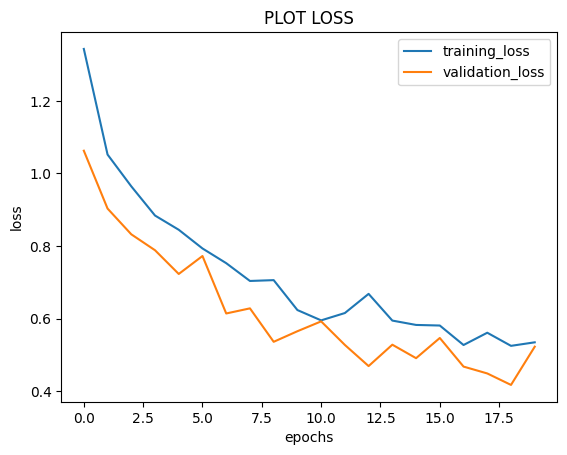

In [10]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('PLOT LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

In [11]:
def predict_img(img_path):
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0

    plt.title("PREDIKSI GAMBAR")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    p = model.predict(img[np.newaxis,...])
    print('Confidence: ',str(round(np.max(p[0])*100, 2))+'%')
    print('Class: ',classes[np.argmax(p[0])])
    print("\n")

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

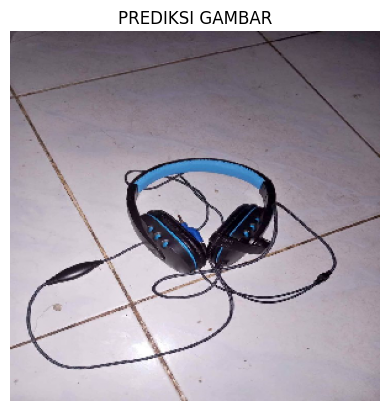

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Confidence:  76.55%
Class:  Headset




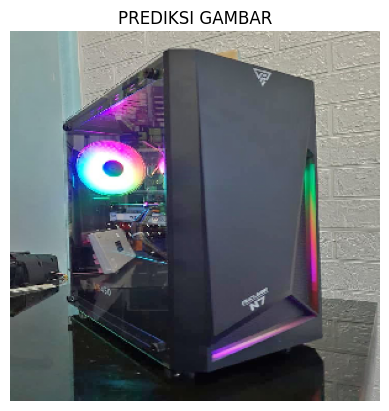

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Confidence:  72.18%
Class:  Case




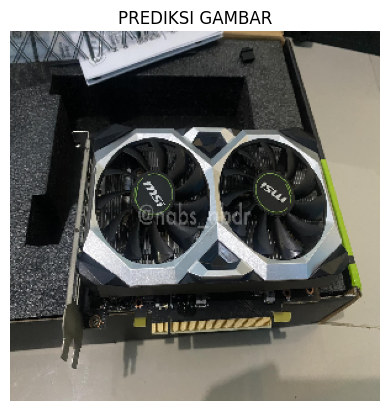

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Confidence:  69.49%
Class:  Gpu




In [13]:
predict_img('uji1.jpg')
predict_img('uji2.jpg')
predict_img('uji3.jpg')

In [14]:
model.save('modelv2.keras')